__<div align='center'><font size='10'>BOSON FACS</font></div>__

In [1]:
import io
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
# import statsmodels.api as sm
import csv
# import pycircos
from scipy.stats import poisson
import itertools
import collections
import seaborn as sns

import FACSus as fs

# sns.set(style="whitegrid")
%cd /gpfs3/well/ansari/users/gjx698/BOSON_FACS
# %cd ..

[Errno 2] No such file or directory: '/gpfs3/well/ansari/users/gjx698/BOSON_FACS'
/gpfs3/well/ansari/users/gjx698/boson/scripts


In [6]:
df = pd.read_csv('../facs/Baseline/try.csv', sep = ',', dtype = {'Patient ID': 'str'})
filtered_columns = [col for col in df.columns if 'CD' in col] + ['Patient ID', 'IID']
df = df[filtered_columns]
df

,CD3-CD56+_panel1,CD3+CD4+CD161+_panel1,CD3+CD8+CD161+_panel1,CD3+CD8+CD161-_panel1,CD3+CD8+CD57+_panel1,CD3+DN_panel1,CD3+DN:MAITS_panel1,CD3-_panel1,CD3-CD56+CD57+_panel1,CD3-CD56+CD56++_panel1,...,CD3+PanGd+_panel5,CD3+PanGd+Vd1+_panel5,CD3+PanGd+Vd2+_panel5,CD3+,CD3+CD4+,CD3+CD8+,CD3+CD8+CD161++,CD3+CD8+CD161+Va7.2+,Patient ID,IID
0,22.60,21.90,8.27,88.5,6.31,8.00,0.29,78.8,42.50,14.70,...,14.6,13.4,5.1,18.96,62.80,25.68,1.6200,1.275,BOSON11051,BOSON11051
1,9.85,9.06,15.40,81.8,7.29,7.90,3.79,39.3,34.60,5.42,...,14.2,24.7,2.6,62.36,57.94,32.34,0.8650,0.845,BOSON11283,BOSON11283
2,15.50,11.80,8.95,87.7,5.33,15.60,2.87,73.0,33.10,5.21,...,11.7,2.2,1.4,31.06,66.98,20.32,1.3450,1.185,BOSON11493,BOSON11493
3,11.90,7.53,15.80,82.0,11.00,2.19,2.53,41.2,9.66,22.80,...,11.6,2.5,0.6,59.76,56.54,36.30,0.2985,0.200,BOSON11165,BOSON11165
4,49.10,22.60,6.54,90.2,3.88,3.46,5.56,36.3,51.50,8.34,...,12.2,6.8,6.4,67.02,77.72,16.70,2.1200,2.220,BOSON11118,BOSON11118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,35.30,14.50,10.20,84.9,7.21,9.38,12.50,53.4,54.70,4.51,...,13.3,8.6,1.4,55.52,58.90,32.10,1.3300,1.535,BOSON11258,BOSON11258
310,7.56,19.60,5.79,92.2,13.30,3.97,6.33,40.7,50.90,15.60,...,9.6,9.1,2.9,61.16,42.02,49.18,0.3700,0.655,BOSON11063,BOSON11063
311,21.30,14.70,9.29,86.8,8.14,5.57,2.98,59.7,68.00,15.80,...,14.2,3.7,15.1,39.40,63.38,26.96,2.3950,1.565,BOSON11166,BOSON11166
312,8.86,12.70,9.69,87.2,15.90,5.52,1.05,37.0,22.10,42.70,...,23.0,5.3,6.3,57.88,62.56,27.32,1.1450,0.760,BOSON11273,BOSON11273


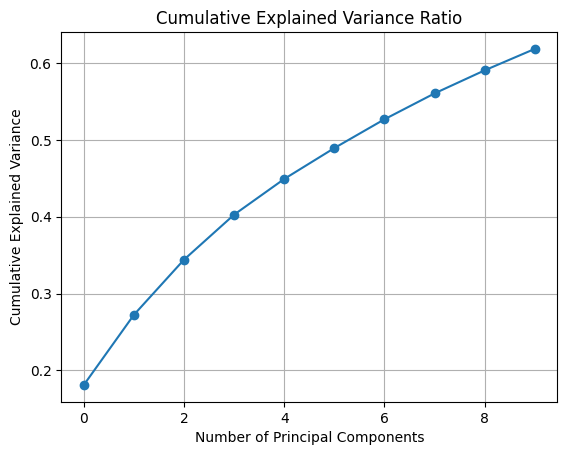

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

selected_columns = [col for col in df.columns if 'CD' in col]
selected_data = df[selected_columns]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio[:10], marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [29]:
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])
for i in range(1,7):
    tmp = pd.concat([df[['Patient ID', 'IID']], principal_df[['PC' + str(i)]]], axis = 1)
    tmp.to_csv('/well/ansari/users/gjx698/boson/boson_vcf/phenotypes/PC' + str(i) + '.txt', header = None, index = None, sep = ' ')